# Modelling prior knowledge in Gaussian processes

## Objectives:

+ Formally introduce the concept of Gaussian process as an extension of multivariate normal distribution.
+ Learn about properties of the mean and covariance functions of the Gaussian. 
+ Encode prior knowledge in a GP.
+ Sample from a GP. 

## Readings:

Please read the following before lecture: 

+ [Chapter 1 from C.E. Rasmussen's textbook on Gaussian processes](http://www.gaussianprocess.org/gpml/chapters/RW1.pdf).

+ (Optional video lecture?) [Neil Lawrence's video lecture on Introduction to Gaussian processes](https://www.youtube.com/watch?v=ewJ3AxKclOg).

## Modelling prior knowledge in Gaussian processes

An experienced scientist or engineer typically has some knowledge about the response function $f(\cdot)$ even before running any simulation. For example, he/she might know that $f(\cdot)$ cannot exceed, or be smaller than, certain values or that it is periodic or shows translational invariance etc. Such knowledge is known as the _prior knowledge_. 
Prior knowledge may be _precise_( the response is twice differentiable), or it may be vague(the probability that the periodicity is $T$ is $p(T)$). When one is dealing with vague prior knowledge, he/she may refer to it as _prior belief_. Almost always, prior knowledge about a computer code is a _prior belief_.


Prior beliefs about $f(\cdot)$ can be modeled by a probability measure on the space of functions from $\mathcal{X}$ to $\mathbb{R}$.
A Gaussian process (GP) is a great way to represent this probability measure. 


## Introduction to Gaussian Processes.


In many engineering problems we have to deal with functions that are unknown.
For example, in oil reservoir modeling, the permeability tensor $\bK(\mathbf{x})$ or the porosity $\phi(\mathbf{x})$ of
the ground are, generally, unknown quantities.
Therefore, we would like to treat them as if they where random.
That is, we have to talk about probabilities on function spaces.
Such a thing is achieved via the theory of *random fields*.
However, instead of developing the generic mathematical theory of random fields,
we concentrate on a special class of random fields, the *Gaussian random fields*
or *Gaussian processes*.

A Gaussian process (GP) is a generalization of a multivariate Gaussian distribution to
*infinite* dimensions.
It essentially defines a probability measure on a function space.
When we say that $f(\cdot)$ is a GP, we mean that it is a random variable that is actually
a function.
Mathematically, we write:
\begin{equation}
f(\cdot) | m(\cdot), k(\cdot, \cdot) \sim \GP\left(f(\cdot) | m(\cdot), k(\cdot, \cdot) \right),
\end{equation}
where 
$m:\mathbb{R}^d \rightarrow \mathbb{R}$ is the *mean function* and 
$k:\mathbb{R}^d \times \mathbb{R}^d \rightarrow \mathbb{R}$ is the *covariance function*.
So, compared to a multivariate normal we have:

+ A random function $f(\cdot)$ instead of a random vector $\mathbf{x}$.
+ A mean function $m(\cdot)$ instead of a mean vector $\bmu$.
+ A covariance function $k(\cdot,\cdot)$ instead of a covariance matrix $\bSigma$.

But, what does this definition actually mean? Actually, it gets its meaning from the multivariate Gaussian distribution. Here is how: 

+ Let $\mathbf{x}_1,\dots,\mathbf{x}_n$ be $n$ points in $\mathbb{R}^d$. To keep the notation down, let us arrange these
points in an $n\times d$ matrix:
\begin{equation}
\mathbf{X} =
\left(
\begin{array}{c}
\mathbf{x}_1\\
\vdots\\
\mathbf{x}_n
\end{array}
\right).
\end{equation}
+ Let $\mathbf{f}\in\mathbb{R}^n$ be the outputs of $f(\cdot)$ on each one of the rows of $\mathbf{X}$, i.e.,
\begin{equation}
\mathbf{f} =
\left(
\begin{array}{c}
f(\mathbf{x}_1)\\
\vdots\\
f(\mathbf{x}_n)
\end{array}
\right).
\end{equation}
+ The fact that $f(\cdot)$ is a GP with mean and covariance function $m(\cdot)$ and $k(\cdot,\cdot)$, respectively, *means* that the vector of outputs $\mathbf{f}$ at
the arbitrary inputs in $\mathbf{X}$ is the following multivariate-normal:
\begin{equation}
\mathbf{f} | \mathbf{X}, m(\cdot), k(\cdot, \cdot) \sim \calN\left(\mathbf{f} | \mathbf{m}(\mathbf{X}), \mathbf{k}(\mathbf{X}, \mathbf{X}) \right),
\end{equation}
with mean vector:
$$
\mathbf{m}(\mathbf{X}) =
\left(
\begin{array}{c}
m(\mathbf{x}_1)\\
\vdots\\
m(\mathbf{x}_n)
\end{array}
\right),
$$
and covariance matrix:
$$
\mathbf{k}(\mathbf{X}, \mathbf{X}) = \left(
\begin{array}{ccc}
k(\mathbf{x}_1,\mathbf{x}_1) & \dots & k(\mathbf{x}_1, \mathbf{x}_n)\\
\vdots & \ddots & \vdots\\
k(\mathbf{x}_n, \mathbf{x}_1) & \dots & k(\mathbf{x}_n, \mathbf{x}_n)
\end{array}
\right).
$$


Now that we have defined a Gaussian process (GP), let us talk about we encode our prior beliefs into a GP. 
We do so through the mean and covariance functions. 

### Interpretation of the mean function.
What is the meaning of $m(\cdot)$?
Well, it is quite easy to grasp.
For any point $\mathbf{x}\in\mathbb{R}^d$, $m(\mathbf{x})$ should give us the value we believe is more probable for 
$f(\mathbf{x})$.
Mathematically, $m(\mathbf{x})$ is nothing more than the expected value of the random variable $f(\mathbf{x})$.
That is:
\begin{equation}
m(\mathbf{x}) = \mathbb{E}[f(\mathbf{x})].
\end{equation}

The mean function can be any arbitrary function. Essentially, it tracks generic trends in the response as the input is varied. In practice, we try and make a suitable choice for the mean function that is easy to work with. Such choices include: 

+ zero, i.e.,
$$
m(\mathbf{x}) = 0.
$$

+ a constant, i.e.,
$$
m(\mathbf{x}) = c,
$$
where $c$ is a parameter.

+ linear, i.e.,
$$
m(\mathbf{x}) = c_0 + \sum_{i=1}^dc_ix_i,
$$
where $c_i, i=0,\dots,d$ are parameters.

+ using a set of $m$ basis functions (generalized linear model), i.e.,
$$
m(\mathbf{x}) = \sum_{i=1}^mc_i\phi_i(\mathbf{x}),
$$
where $c_i$ and $\phi_i(\cdot)$ are parameters and basis functions.

+ generalized polynomial chaos (gPC), i.e., 
using a set of $d$ polynomial basis functions upto a given degree $\rho$
$m(\mathbf{x}) = \sum_{i=1}^{d}c_i\phi_i(\mathbf{x})$ 
where the basis functions $\phi_i$ are mutually orthonormal with respect to some 
measure $\mu$:
$$
\int \phi_{i}(\mathbf{x}) \phi_{j}(\mathbf{x}) d\mu(\mathbf{x}) = \delta_{ij}
$$

+ and many other possibilities. 

### Interpretation of the covariance function.
What is the meaning of $k(\cdot, \cdot)$?
This concept is considerably more challenging than the mean.

Let's try to break it down:

+ Let $\mathbf{x}\in\mathbb{R}^d$. Then $k(\mathbf{x}, \mathbf{x})$ is the variance of the random variable $f(\mathbf{x})$, i.e.,
$$
\mathbb{V}[f(\mathbf{x})] = \mathbb{E}\left[\left(f(\mathbf{x}) - m(\mathbf{x}) \right)^2 \right].
$$
In other words, we believe that there is about $95\%$ probability that the value of
the random variable $f(\mathbf{x})$ fall within the interval:
$$
\left((m(\mathbf{x}) - 2\sqrt{k(\mathbf{x}, \mathbf{x})}, m(\mathbf{x}) + 2\sqrt{k(\mathbf{x},\mathbf{x})}\right).
$$

+ Let $\mathbf{x},\mathbf{x}'\mathbb{R}^d$. Then $k(\mathbf{x}, \mathbf{x}')$ tells us how the random variable $f(\mathbf{x})$ and
$f(\mathbf{x}')$ are correlated. In particular, $k(\mathbf{x},\mathbf{x}')$ is equal to the covariance
of the random variables $f(\mathbf{x})$ and $f(\mathbf{x}')$, i.e.,
$$
k(\mathbf{x}, \mathbf{x}') = \mathbb{C}[f(\mathbf{x}), f(\mathbf{x}')]
= \mathbb{E}\left[
\left(f(\mathbf{x}) - m(\mathbf{x})\right)
\left(f(\mathbf{x}') - m(\mathbf{x}')\right)
\right].
$$

Essentially, a covariance function (or covariance kernel) defines a nearness or similarity measure on the input space. We cannot choose any arbitrary function of two variables as a covariance kernel. How we go about choosing a covariance function is discussed in great detail [here](http://www.gaussianprocess.org/gpml/chapters/RW4.pdf). We briefly discuss some properties of covariance functions here and then we shall move onto a discussion of what kind of prior beliefs we can encode through the covariance function. 

### Properties of the covariance function

+ There is one property of the covariance function that we can note right away.
Namely, that for any $\mathbf{x}\in\mathbb{R}^d$, $k(\mathbf{x}, \mathbf{x}) > 0$.
This is easly understood by the interpretation of $k(\mathbf{x}, \mathbf{x})$ as the variance
of the random variable $f(\mathbf{x})$.

+ $k(\mathbf{x}, \mathbf{x}')$ becomes smaller as the distance between $\mathbf{x}$ and $\mathbf{x}'$ grows.

+ For any choice of points $\mathbf{X}\in\mathbb{R}^{n\times d}$, the covariance matrix: $\bK(\mathbf{X}, \mathbf{X})$ has
to be positive-definite (so that the vector of outputs $\mathbf{f}$ is indeed a multivariate
normal distribution).


###Encoding prior beliefs in the covariance function. 

+ **Modeling measuremeant noise**. If we believe that measurements of the function $f(\cdot)$ are noisy (perhaps due to the computer simulator being stochastic such as a molecular dynamics simulator), this can be incorporated into the covariance functionas as follows: 

$$
k(\mathbf{x}, \mathbf{x}') = k_0 (\mathbf{x}, \mathbf{x}') + \sigma^2 \delta(\mathbf{x} - \mathbf{x}')
$$

The quantity $\sigma$ becomes an additional hyperparameter in the covariance kernel which is learned as data observations are made. 

+ **Modeling regularity**. The choice of the covariance function controls the regularity properties of the functions sampled from the probability induced by the GP. For example, if the covariance kernel chosen is the squared exponential kernel, which is infinitely differentiable, then the functions sampled from the GP will also be infinitely differentiable. 

+ **Modeling invariance** If the covariance kernel is invariant w.r.t. a transformation $T$, i.e., $k(\mathbf{x}, T\mathbf{x}')=k(T\mathbf{x}, \mathbf{x}')=k(\mathbf{x}, \mathbf{x}')$ then samples from the GP will be invariant w.r.t. the same transformation. 

+ Other possibilities include periodicity, additivity etc. 

### Squared exponential covariance function

Squared expnential (SE) is the most commonly used covariance function.
Its formula is as follows:
$$
k(\mathbf{x}, \mathbf{x}') = s^2\exp\left\{-\frac{1}{2}\sum_{i=1}^d\frac{(x_i - x_i')^2}{\ell_i^2}\right\},
$$
where $s,\ell_i>0, i=1,\dots,d$ are parameters.
The interpretation of the parameters is as follows:

+ $s$ is known as the *signal strength*. The bigger it is, the more the GP $f(\cdot)$ will vary
about the mean.

+ $\ell_i$ is known as the *length scale* of the $i$-th input dimension of the GP.
The bigger it is, the smoother the samples of $f(\cdot)$ appear along the $i$-th input dimension.

Here is a python function that defines the squared exponential covariance function:

In [1]:
import numpy as np
import math
def se_cov(x1, x2, s=1., ell=1.):
    """
    A function the computes the SE covariance:
    
    :param x1:        One input point (1D array).
    :param x2:        Another input point (1D array).
    :param s:         The signal strength (> 0).
    :param ell:       The length scale(s). Either a positive number or a 1D array of
                      positive numbers.
    :returns:         The value of the SE covariance evaluated at x1 and x2 with
                      signal strength s and length scale(s) ell.
    
    .. pre::
        
        + x1 must have the same dimensions as x2
        + ell must either be a float or a 1D array with the same dimensions as x1
    """
    tmp = (x1 - x2) / ell
    return s ** 2 * math.exp(-0.5 * np.dot(tmp, tmp))

As you can see `se_cov()` implements the SE covariance function.
Let's look at it in one dimension, i.e., $d=1$. We will fix $x'=0$
and plot $k(x,0)$ as a function of $x$.

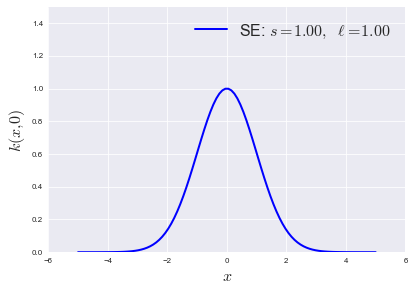

In [2]:
%matplotlib inline
import seaborn as sns
sns.set_context('paper')
import matplotlib.pyplot as plt
# The signal strength we want to use
s = 1.
# The lentgh scale we want to use
ell = 1.
x = np.linspace(-5, 5, 100)
kx = [se_cov(x[i], 0, s=s, ell=ell) for i in xrange(x.shape[0])]
plt.plot(x, kx, 'b', linewidth=2, label='SE: $s=%1.2f,\;\ell=%1.2f$' % (s, ell))
plt.ylim([0., 1.5])
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$k(x,0)$', fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()

For convenience, let us also create a wrapper on top of the covariance function we just implemented, 
that will allow us to compute covariance matrix. The following code compute
the cross covariance
$$
\mathbf{k}(\mathbf{X}_1, \mathbf{X}_2) =
\left(
\begin{array}{ccc}
k(\mathbf{x}_{11}, \mathbf{x}_{21}) & \dots & k(\mathbf{x}_{11}, \mathbf{x}_{2n_2})\\
\vdots & \ddots & \vdots \\
k(\mathbf{x}_{1n_1}, \mathbf{x}_{21}) & \dots & k(\mathbf{x}_{1n_1}, \mathbf{x}_{2n_2})
\end{array}
\right).
$$

In [3]:
def cov_mat(X1, X2, cov_fun=se_cov, **cov_params):
    """
    Compute the cross covariance matrix of `X1` and `X2` for the covariance
    function `cov_fun`.
    
    :param X1:           A matrix of input points (n1 x d)
    :param X2:           A matrix of input points (n2 x d)
    :param cov_fun:      The covariance function to use
    :param cov_param:    Any parameters that we should pass to the covariance
                         function `cov_fun`.
    """
    X1 = np.array(X1)
    X2 = np.array(X2)
    return np.array([[cov_fun(X1[i, :], X2[j, :], **cov_params) for j in xrange(X2.shape[0])]
                     for i in xrange(X1.shape[0])])

Let us use this code to plot the SE covariance function for various choices of length scales.

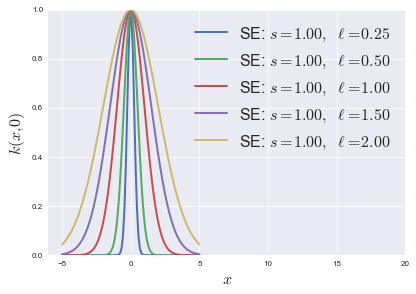

In [4]:
ells = [0.25, 0.5, 1., 1.5, 2.]
s = 1.
for ell in ells:
    k = cov_mat(x[:, None], [[0]], ell=ell)
    plt.plot(x, k, linewidth=2, label='SE: $s=%1.2f,\;\ell=%1.2f$' % (s, ell))
plt.ylim([0., 1.])
plt.xlim([-6, 20])
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$k(x,0)$', fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()

Now, let's repeat this for various signal strengths.

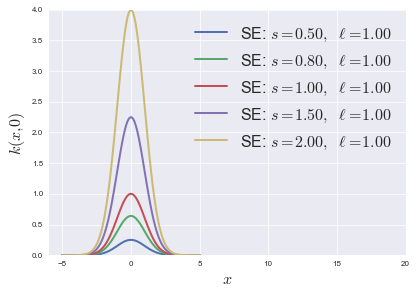

In [5]:
ell = 1.
ss = [0.5, 0.8, 1., 1.5, 2.]
for s in ss:
    k = cov_mat(x[:, None], [[0]], s=s)
    plt.plot(x, k, linewidth=2, label='SE: $s=%1.2f,\;\ell=%1.2f$' % (s, ell))
plt.xlim([-6, 20])
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$k(x,0)$', fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()

Now, let's look at the covariance function in 2D.
We will plot $k(\bx = (x_1, x_2), \bzero_2)$ as a function of $x_1$ and $x_2$.

First we need a grid:

In [6]:
x = np.linspace(-3, 3, 16)
X1, X2 = np.meshgrid(x, x)

We will evaluate the covariance at these points:

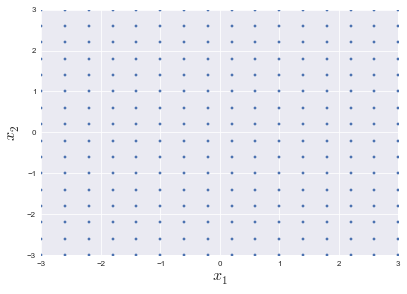

In [7]:
X = np.hstack([X1.flatten()[:, None], X2.flatten()[:, None]])
plt.plot(X[:, 0], X[:, 1], '.')
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)

Let's plot the covariance:

<matplotlib.contour.QuadContourSet instance at 0x1123bb998>

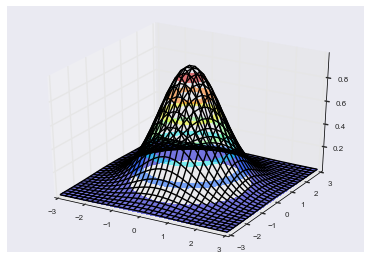

In [32]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
s = 1.
ell = 1.
k = cov_mat(X, [[0, 0]], s=s, ell=ell)
K = k.reshape(X1.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X1, X2, K, color='black')
ax.contourf(X1, X2, K, alpha=0.5, cmap = plt.cm.jet)

Now, let us plot it, with different length scales per input:

<matplotlib.contour.QuadContourSet instance at 0x1127520e0>

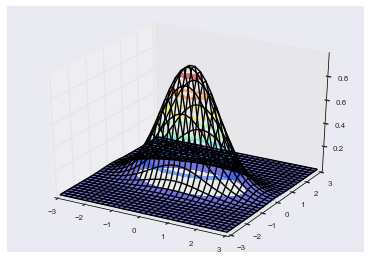

In [28]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
s = 1.
ell = [1, 0.5]
k = cov_mat(X, [[0, 0]], s=s, ell=ell)
K = k.reshape(X1.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X1, X2, K, color='black')
ax.contourf(X1, X2, K, alpha=0.5, cmap = plt.cm.jet)

### Sampling from a Gaussian Process. 


Samples from a Gaussian process are functions. But how can we get them? Well, actually,
we **are not** going to sample real functions.
What we are going to do is pick a dense set of points $\mathbf{X}\in\mathbb{R}^{n\times d}$
sample the value of the GP, $\mathbf{f} = (f(\mathbf{x}_1),\dots,f(\mathbf{x}_n))$ on these points.
We saw above that the probability density of $\mathbf{f}$ is just a multivariate normal
with a mean vector that is specified from the mean function and a covariance matrix
that is specified by the covariance function.
Therefore, all we need to know is how to sample from the multivariate normal.
But, we have learned this already...

Here is the code:
(For the moment, ignore the `noise_variance` parameter. We will explain what it does later on.
Its sole purpose to stabilize the Cholesky decomposition.)

In [10]:
import scipy.linalg
from scipy.stats import norm
def sample_gp(X, cov_fun=se_cov, num_samples=1, noise_variance=1e-12, **cov_params):
    """
    Sample a zero-mean Gaussian process at the inputs specified by X.
    
    :param X:              The input points on which we will sample the GP.
    :param cov_fun:        The covariance function we use.
    :param num_samples:    The number of samples to take.
    :param noise_variance: The noise of the process.
    :param cov_params:     Any parameters of the covariance function.
    """
    # Compute the covariance matrix:
    K = cov_mat(X, X, cov_fun=cov_fun, **cov_params) + noise_variance * np.eye(X.shape[0])
    # Compute the cholesky of this:
    L = scipy.linalg.cholesky(K, lower=True) 
    # Take a sample of standard normals
    z = norm.rvs(size=(X.shape[0], num_samples))
    # Build the sample from the multivariate normal
    f = np.dot(L, z)
    return f.T

### Samples in 1D

Perhaps, the best way to demonstrate this is via a 1D example.
We will take the mean function to be zero (dashed blue line).
We take 5 samples of $f(\cdot)$ (red lines).

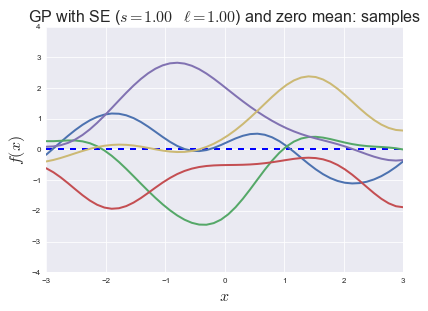

In [15]:
cov_fun=se_cov
s = 1.
ell = 1.
x = np.linspace(-3, 3, 50)[:, None]
f = sample_gp(x, num_samples=5, cov_fun=cov_fun, s=s, ell=ell)
plt.plot(x, np.zeros(x.shape[0]), '--b', linewidth=2, label='$m(x)$')
plt.plot(x, f.T, linewidth=2, label='GP samples')
plt.ylim([-4, 4])
plt.title('GP with SE ($s=%1.2f\; \ell=%1.2f$) and zero mean: samples' % (s, ell), fontsize=16)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$f(x)$', fontsize=16)

#### Making the length scale $\ell$ smaller
Let us now repeat this experiment with a smaller length scale:

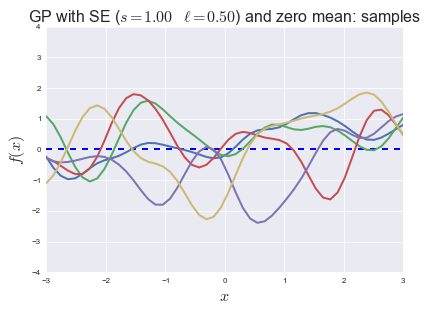

In [17]:
cov_fun=se_cov
s = 1.
ell = .5
x = np.linspace(-3, 3, 50)[:, None]
f = sample_gp(x, num_samples=5, cov_fun=cov_fun, s=s, ell=ell)
plt.plot(x, np.zeros(x.shape[0]), '--b', linewidth=2, label='$m(x)$')
plt.plot(x, f.T, linewidth=2, label='GP samples')
plt.ylim([-4, 4])
plt.title('GP with SE ($s=%1.2f\; \ell=%1.2f$) and zero mean: samples' % (s, ell), fontsize=16)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$f(x)$', fontsize=16)

#### Making the length scale $\ell$ bigger

Now we make $\ell$ bigger and repeat the experiment:

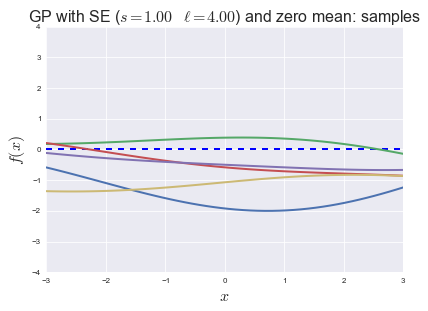

In [18]:
cov_fun=se_cov
s = 1.
ell = 4.
x = np.linspace(-3, 3, 50)[:, None]
f = sample_gp(x, num_samples=5, cov_fun=cov_fun, s=s, ell=ell)
plt.plot(x, np.zeros(x.shape[0]), '--b', linewidth=2, label='$m(x)$')
plt.plot(x, f.T, linewidth=2, label='GP samples')
plt.ylim([-4, 4])
plt.title('GP with SE ($s=%1.2f\; \ell=%1.2f$) and zero mean: samples' % (s, ell), fontsize=16)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$f(x)$', fontsize=16)

#### Making the signal strength, $s$, bigger

Let's increase the signal strength $s$ and see what happens:

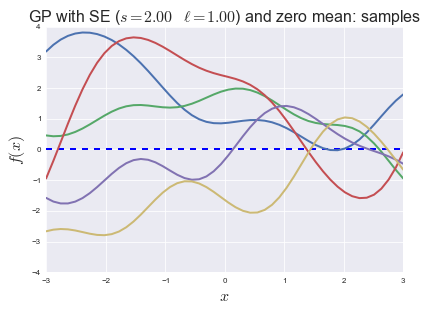

In [19]:
cov_fun=se_cov
s = 2.
ell = 1.
x = np.linspace(-3, 3, 50)[:, None]
f = sample_gp(x, num_samples=5, cov_fun=cov_fun, s=s, ell=ell)
plt.plot(x, np.zeros(x.shape[0]), '--b', linewidth=2, label='$m(x)$')
plt.plot(x, f.T, linewidth=2, label='GP samples')
plt.ylim([-4, 4])
plt.title('GP with SE ($s=%1.2f\; \ell=%1.2f$) and zero mean: samples' % (s, ell), fontsize=16)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$f(x)$', fontsize=16)

#### Making the signal strength, $s$, smaller

Finally, we decrease the signal strength to see what will happen to the samples:

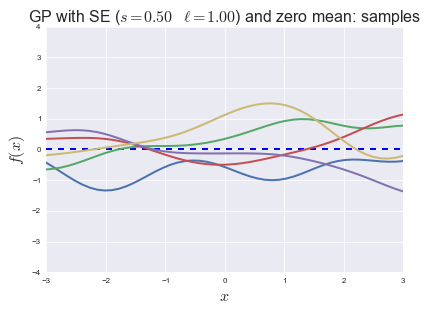

In [20]:
cov_fun=se_cov
s = 0.5
ell = 1.
x = np.linspace(-3, 3, 50)[:, None]
f = sample_gp(x, num_samples=5, cov_fun=cov_fun, s=s, ell=ell)
plt.plot(x, np.zeros(x.shape[0]), '--b', linewidth=2, label='$m(x)$')
plt.plot(x, f.T, linewidth=2, label='GP samples')
plt.ylim([-4, 4])
plt.title('GP with SE ($s=%1.2f\; \ell=%1.2f$) and zero mean: samples' % (s, ell), fontsize=16)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$f(x)$', fontsize=16)

### Adding a mean function

How do we sample from a GP with a non-zero mean function? Well, you just have to add the mean
function to the samples you take.
Let us look at sample samples from a GP with a SE covariance and a mean function given by:
$$
m(x) = 5\sin(x) e^{-|x|}.
$$
Here is the code:

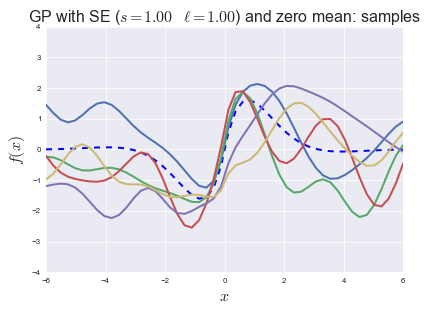

In [21]:
cov_fun=se_cov
s = 1.
ell = 1.
x = np.linspace(-6, 6, 50)[:, None]
m = 5. * np.sin(x) * np.exp(-np.abs(x))
f = m.T + sample_gp(x, num_samples=5, cov_fun=cov_fun, s=s, ell=ell)
plt.plot(x, m, '--b', linewidth=2, label='$m(x)$')
plt.plot(x, f.T, linewidth=2, label='GP samples')
plt.ylim([-4, 4])
plt.title('GP with SE ($s=%1.2f\; \ell=%1.2f$) and zero mean: samples' % (s, ell), fontsize=16)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$f(x)$', fontsize=16)

### Sampling in 2D

Sampling a 2D GP, i.e., the input $\bx$ has two components, is as easy as sampling from the 1D
GP.

The first step is to get a grid of points in two dimensions.
You do this as follows:

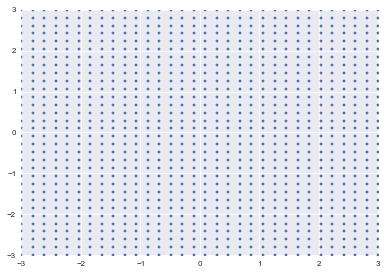

In [22]:
x = np.linspace(-3, 3, 32)
X1, X2 = np.meshgrid(x, x)
X = np.hstack([X1.flatten()[:, None], X2.flatten()[:, None]])
plt.plot(X[:, 0], X[:, 1], '.')
plt.show()

What we are going to do is sample the GP on each one of these points:

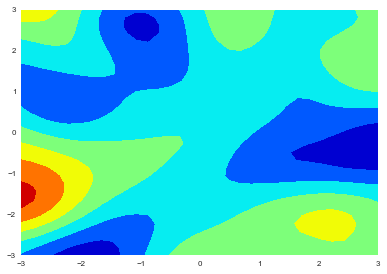

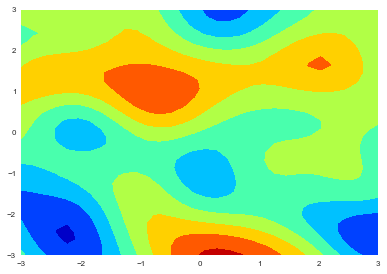

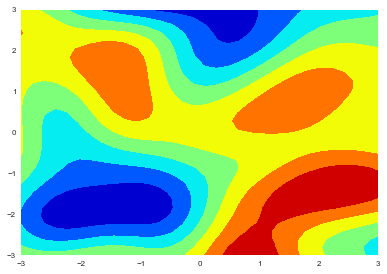

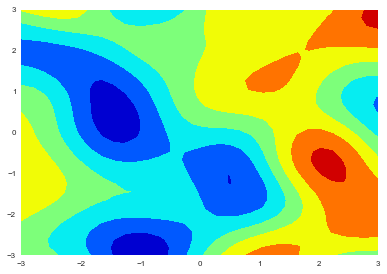

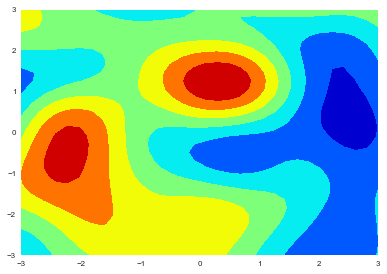

In [29]:
num_samples = 5
s = 1.
ell = 1.
fig = plt.figure()
f = sample_gp(X, num_samples=num_samples, cov_fun=cov_fun, s=s, ell=ell)
F = f.reshape((num_samples, ) + X1.shape)
for i in xrange(num_samples):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.contourf(X1, X2, F[i, :, :], cmap = plt.cm.jet)

Let us now repeat the experiment with a much smaller length scale:

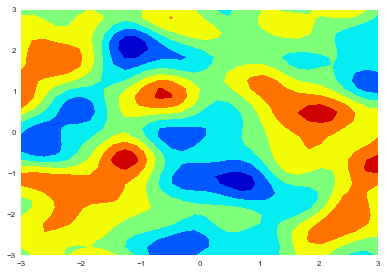

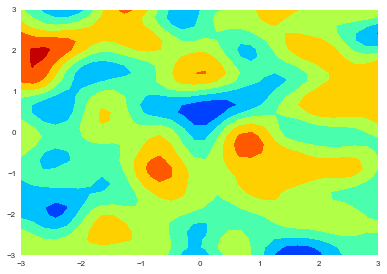

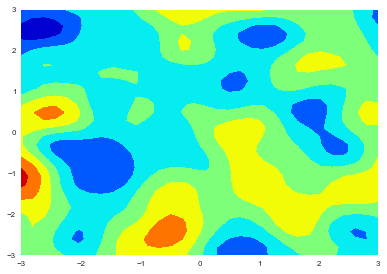

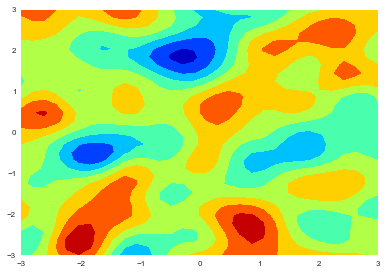

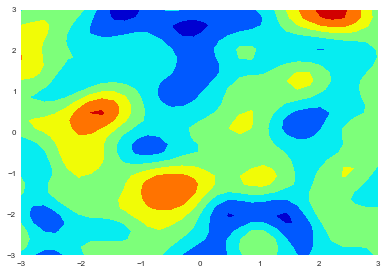

In [30]:
num_samples = 5
s = 1.
ell = .5
fig = plt.figure()
f = sample_gp(X, num_samples=num_samples, cov_fun=cov_fun, s=s, ell=ell)
F = f.reshape((num_samples, ) + X1.shape)
for i in xrange(num_samples):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.contourf(X1, X2, F[i, :, :], cmap = plt.cm.jet)

Now, let us make one length scale small (the horizontal) and one large:

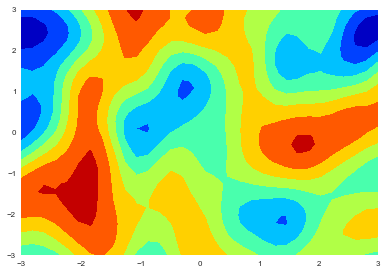

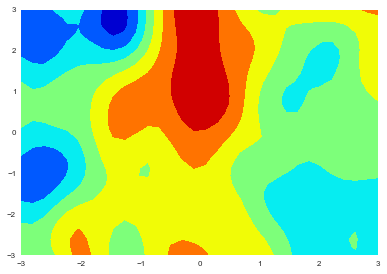

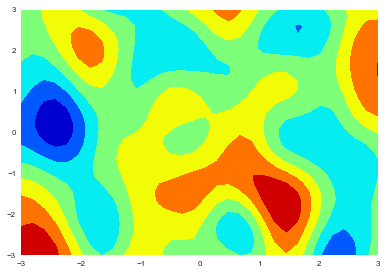

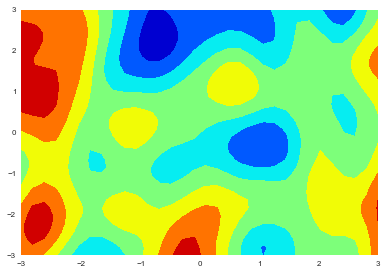

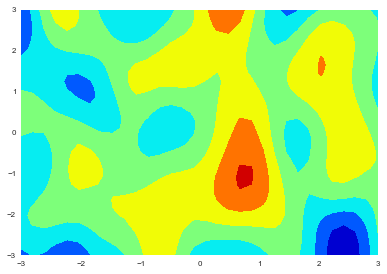

In [31]:
num_samples = 5
s = 1.
ell = [0.5, 1.]
fig = plt.figure()
f = sample_gp(X, num_samples=num_samples, cov_fun=cov_fun, s=s, ell=ell)
F = f.reshape((num_samples, ) + X1.shape)
for i in xrange(num_samples):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.contourf(X1, X2, F[i, :, :], cmap = plt.cm.jet)

### Karhunen-Loeve Expansion.

Consider a Gaussian random field over a set $\Omega \subset \R^d$:
\begin{equation}
f(\cdot) | m(\cdot), k(\cdot, \cdot) \sim \GP\left(f(\cdot) | m(\cdot), k(\cdot, \cdot) \right),
\end{equation}
where 
$m:\Omega\rightarrow R$ is the mean function and 
$k:\Omega\times\Omega\rightarrow\R$ is the covariance function.
The *Karhunen-Loève expansion* (KLE) of $f(\cdot)$ allows us to write it as:
\begin{equation}
f(\bx) = m(\bx) + \sum_{i=1}^{\infty}\xi_i \sqrt{\lambda_i} \phi_i(\bx),
\end{equation}
where the random variables
\begin{equation}
\xi \sim \calN(\xi|0, 1)
\end{equation}
are independent, and $\lambda_i$ and $\phi_i(\bx)$ are the eigenvalues and
eigenvectors, respectively, of the covariance function, i.e.,
\begin{equation}
\int_{\Omega} k(\bx, \bx') \phi_i(\bx')d\bx' = \lambda_i \phi_i(\bx').
\end{equation}
Since $k(\bx, \bx')$ is actually positive definite, the eigenvalues are all positive
and the eigenfunctions are orthogonal:
$$
\int_{\Omega} \phi_i(\bx)\phi_j(\bx')d\bx = \delta_{ij}.
$$

### Truncated KLE
Usually, we truncate the KLE to a finite order $M$, i.e., we write
\begin{equation}
f(\bx) \approx f_M(\bx) = m(\bx) + \sum_{i=1}^M \xi_i \sqrt{\lambda_i}\phi_i(\bx).
\end{equation}
But how do we pick $M$ in practice?

In order to answer this question, notice that the variance of the field at the point $\bx$ is given by:
$$
\mathbb{V}[f(\bx)] = \sum_{i=1}^{\infty}\lambda_i\phi_i^2(\bx)
$$
The *energy* of the field, $\mathcal{E}[f(\cdot)]$ is defined to be:
\begin{equation}
\mathcal{E}[f(\cdot)] := \int_{\Omega}\mathbb{V}[f(\bx)]d\bx = \sum_{i=1}^\infty \lambda_i,
\end{equation}
where we have used the orthonormality of the $\phi(\bx)$'s.
The energy of the field is a measure of the total variance of the field.
The idea is to select $M$ so that the energy of the truncated field $f_M(\bx)$ is as
captures a percentage $\alpha$ of the energy of the original field.
That is, we pick $M$ so that
$$
\mathcal{E}[f_M(\cdot)] = \alpha\mathcal{E}[f(\cdot)],
$$
or
$$
\sum_{i=1}^M\lambda_i = \alpha \sum_{i=1}^\infty \lambda_i.
$$
Typically, $\alpha = 0.95$.

### Why is this useful?
The KLE allows us to reduce the dimensionality of random fields.
This is extremely useful in uncertainty propagation and model calibration tasks.
For example, in uncertainty propagation, by employing the KLE one has to deal with
a finite set of Gaussian random variables $\xi_i$ instead of an infinitely dimensional
Gaussian random field.

### Numerical computation of KLE
Solving the integral equation for the eigenvalues and eigenvectors of $k(\bx,\bx')$ is actually very difficult.
Instead, one uses a quadrature rule on the space of $\bx$, $\{w_j, \bx_j\}_{j=1}^N$,
and approximates the left hand side of the integral equation as follows:
$$
\sum_{j=1}^N w_j k(\bx, \bx_j)\phi_i(\bx_j) = \lambda_i \phi_i(\bx).
$$
From this, we see that we can express the eigenfunctions as:
$$
\phi_i(\bx) = \lambda_i^{-1}\sum_{j=1}^Nw_jk(\bx, \bx_j)\phi_i(\bx_j),
$$
if we new the eigenvalues, as well as their values of the quadrature points.

In order to approximate $\lambda_i$ and $\phi_i(\bx_j)$, we consider the following finite dimensional eigenvalue
problem:
$$
\sum_{j=1}^N w_j k(\bx_i, \bx_j) v_j = \mu v_i,
$$
or in matrix form:
$$
\bK \mbox{diag}(w) \bv = \mu \bv,
$$
where
$$
K_{ij} = k(\bx_i, \bx_j).
$$
Assuming that by solving it, we obtain the eigenvalues $\mu_i$ and the eigenvectors
$\bv_i$ for $i=1,\dots,N$, we estimate that:
$$
\lambda_i \approx \mu_i,\;\mbox{for}\;$i=1,\dots,N$,
$$
$$
\lambda_i \approx 0,\;\mbox{for}\;$i>N$,
$$
and
$$
\phi_i(\bx_j) = v_{ij},
$$
for $i,j=1,\dots,N$.
Returning back to the full eigenfunctions, we see that they can be expressed as:
$$
\phi_i(\bx) = \mu^{-1}_i\sum_{j=1}^{N}v_{ij} w_j k(\bx_j, \bx),
$$
for $i=1,\dots,N$.

The most common choice of quadrature points is to pick $w_i = \frac{1}{N}$ and
$\bx_i$ to be either random or on a grid. We will try a few.
